# Aprendizaje no supervisado-K-Means
## Valeria Pérez Cong S
## 145009

Se obtuvo un set de datos de UCI Machine Learning con las ventas durante un año de una tienda en línea inglesa. Esta es la descripción de cada variable:

+ InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation
 
+ StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product. 

+ Description: Product (item) name. Nominal. 

+ Quantity: The quantities of each product (item) per transaction. Numeric.	

+ InvoiceDate: Invice Date and time. Numeric, the day and time when each transaction was generated. 

+ UnitPrice: Unit price. Numeric, Product price per unit in sterling. 

+ CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer. 

+ Country: Country name. Nominal, the name of the country where each customer resides.

Con estos datos de las ventas, buscamos hacer clusters de los **clientes** de esta tienda. Para generar los grupos únicamente usaremos las variables Quantity y UnitPrice. 

In [2]:
import pandas as pd
import numpy as np
import sklearn as sl
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
#retail_data = pd.read_csv("/Users/valeriaperezcong/Desktop/ITAM/9/aprendizaje/udemy/DataScience-Python3/kmeans/online_retail.csv")
retail_data = pd.read_csv("/Users/valeriaperezcong/Desktop/ITAM/9/aprendizaje/udemy/DataScience-Python3/kmeans/retail.csv")

In [12]:
retail_data.shape

(541909, 3)

In [13]:
retail_data.head(5)

,Quantity,UnitPrice,Country
0,6,2.55,United Kingdom
1,6,3.39,United Kingdom
2,8,2.75,United Kingdom
3,6,3.39,United Kingdom
4,6,3.39,United Kingdom


In [14]:
retail_data.describe()

,Quantity,UnitPrice
count,541909.000000,541909.000000
mean,9.552250,4.611114
std,218.081158,96.759853
min,-80995.000000,-11062.060000
25%,1.000000,1.250000
50%,3.000000,2.080000
75%,10.000000,4.130000
max,80995.000000,38970.000000


Se puede observar que hay observaciones con cantidades y precios menores a cero (seguramente devoluciones). Descartamos estas observaciones.

In [37]:
retail = retail_data[retail_data['Quantity'] > 0]

In [38]:
retail = retail[retail['UnitPrice'] > 0.99]

In [39]:
retail.describe()

,Quantity,UnitPrice
count,419211.000000,419211.000000
mean,8.279623,4.776021
std,171.939050,40.342822
min,1.000000,1.000000
25%,1.000000,1.650000
50%,3.000000,2.890000
75%,8.000000,4.950000
max,80995.000000,13541.330000


In [40]:
retail['Quantity'].mean()

8.2796229106583557

El tercer cuartil de Quantity es 8 y la media es de 8.28, pero el valor máximo es de 80995. Por tanto, lo descartamos. 

In [41]:
retail = retail[retail['Quantity'] < 80995]
retail.describe()

,Quantity,UnitPrice
count,419210.000000,419210.000000
mean,8.086434,4.776028
std,117.971594,40.342870
min,1.000000,1.000000
25%,1.000000,1.650000
50%,3.000000,2.890000
75%,8.000000,4.950000
max,74215.000000,13541.330000


In [42]:
retail = retail[retail['Quantity'] < 74215]
retail.describe()

,Quantity,UnitPrice
count,419209.000000,419209.000000
mean,7.909417,4.776037
std,27.953868,40.342918
min,1.000000,1.000000
25%,1.000000,1.650000
50%,3.000000,2.890000
75%,8.000000,4.950000
max,3114.000000,13541.330000


Ahora bien, vemos que el tercer cuartil del precio es 4.95 pero hay un precio outlier de 13451, lo cual es muy alto. Lo eliminamos. 

In [43]:
retail = retail[retail['UnitPrice'] < 13500]
retail.describe()

,Quantity,UnitPrice
count,419208.000000,419208.000000
mean,7.909434,4.743746
std,27.953899,34.502853
min,1.000000,1.000000
25%,1.000000,1.650000
50%,3.000000,2.890000
75%,8.000000,4.950000
max,3114.000000,11062.060000


In [44]:
retail = retail[retail['UnitPrice'] < 11000]
retail.describe()

,Quantity,UnitPrice
count,419207.00000,419207.000000
mean,7.90945,4.717369
std,27.95393,29.979865
min,1.00000,1.000000
25%,1.00000,1.650000
50%,3.00000,2.890000
75%,8.00000,4.950000
max,3114.00000,8142.750000


In [45]:
retail = retail[retail['UnitPrice'] < 8000]
retail.describe()

,Quantity,UnitPrice
count,419206.000000,419206.000000
mean,7.909467,4.697956
std,27.953962,27.217832
min,1.000000,1.000000
25%,1.000000,1.650000
50%,3.000000,2.890000
75%,8.000000,4.950000
max,3114.000000,4505.170000


In [46]:
retail = retail[retail['UnitPrice'] < 1500]
retail.describe()

,Quantity,UnitPrice
count,419174.000000,419174.000000
mean,7.909994,4.520573
std,27.954963,16.355220
min,1.000000,1.000000
25%,1.000000,1.650000
50%,3.000000,2.890000
75%,8.000000,4.950000
max,3114.000000,1483.210000


### Escalamos los datos

In [48]:
retail_scale_unit_price = (retail['UnitPrice'] - retail['UnitPrice'].mean())/retail['UnitPrice'].std()
retail_scale_quantity = (retail['Quantity'] - retail['Quantity'].mean())/retail['Quantity'].std()

retail_scaled = pd.DataFrame({"UnitPrice": retail_scale_unit_price, "Quantity": retail_scale_quantity})
retail_scaled.describe()

,Quantity,UnitPrice
count,4.191740e+05,4.191740e+05
mean,2.312119e-17,-5.373474e-17
std,1.000000e+00,1.000000e+00
min,-2.471831e-01,-2.152568e-01
25%,-2.471831e-01,-1.755142e-01
50%,-1.756395e-01,-9.969739e-02
75%,3.219664e-03,2.625628e-02
max,1.111105e+02,9.041086e+01


Se puede observar que ahora los datos tienen media cercana a cero y desviacion estandar de 1. 

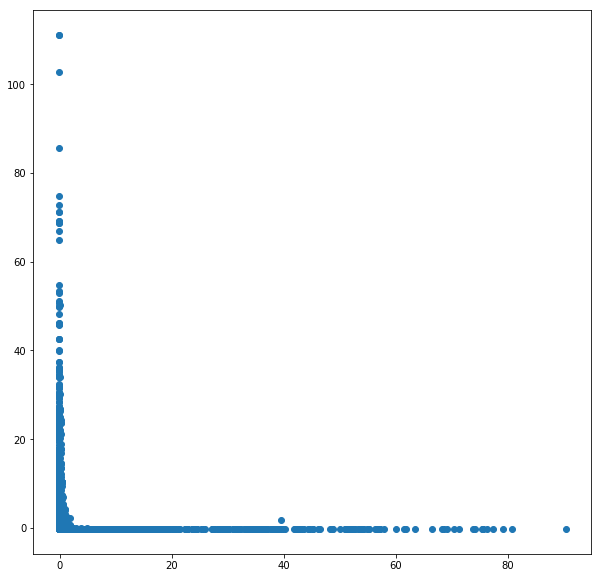

In [49]:
plt.figure(figsize=(10,10))
plt.scatter(retail_scaled['UnitPrice'], retail_scaled['Quantity'])

## K means con 5 clusters

In [51]:
X = retail_scaled.as_matrix(columns=['UnitPrice','Quantity'])

In [52]:
from sklearn.cluster import KMeans
clusters = KMeans(init="k-means++", n_clusters=5, n_init=10)
clusters.fit_predict(X)

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [56]:
#centroide
centroids = clusters.cluster_centers_
centroids

array([[ -3.01017035e-02,  -7.93778540e-02],
       [  4.67650470e+01,  -2.29883609e-01],
       [ -1.44352114e-01,   3.36538702e+01],
       [ -1.48003901e-01,   4.43903951e+00],
       [  1.16396145e+01,  -2.44242947e-01]])

In [53]:
#al set le agregamos el cluster al que pertenece
retail_scaled['grupo'] = clusters.labels_
retail_scaled.head()

,Quantity,UnitPrice,grupo
0,-0.068324,-0.120486,0
1,-0.068324,-0.069126,0
2,0.003220,-0.108257,0
3,-0.068324,-0.069126,0
4,-0.068324,-0.069126,0


In [54]:
#número de observaciones por grupo
retail_scaled.groupby('grupo').size()

grupo
0    411960
1       122
2       148
3      6287
4       657
dtype: int64

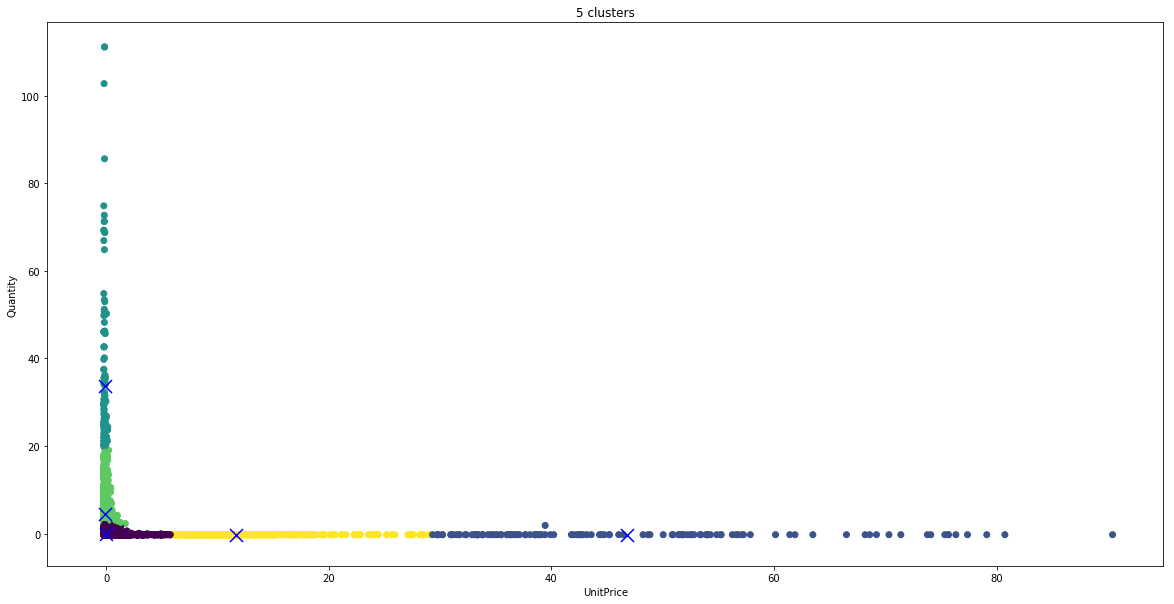

In [57]:
plt.figure(figsize=(20,10))
plt.scatter(retail_scaled['UnitPrice'], retail_scaled['Quantity'], c=retail_scaled['grupo'])
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='b', zorder=10)
plt.xlabel("UnitPrice")
plt.ylabel("Quantity")
plt.title("5 clusters")

## Set de Abalone

In [60]:
abalone = pd.read_csv("/Users/valeriaperezcong/Desktop/ITAM/9/aprendizaje/udemy/DataScience-Python3/kmeans/abalone.data.csv",header=None)

In [61]:
abalone.head(7)

,0,1,2,3,4,5,6,7,8
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7
5,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8
6,F,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.330,20


Se puede observar que tenemos 8 variables distintas, 7 de ellas son numericas y 1 es categórica. La columna 0 tiene la clasificación del sexo del abalone: Male, Female o Infant. 

In [103]:
from sklearn.cross_validation import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(abalone[abalone.columns[1:8]], abalone[[0]], train_size=0.75)
X_train, X_test, Y_train, Y_test = np.asarray(X_train), np.asarray(X_test), np.asarray(Y_train), np.asarray(Y_test)

In [104]:
X_train

array([[ 0.415 ,  0.325 ,  0.1   , ...,  0.1445,  0.0715,  0.095 ],
       [ 0.675 ,  0.535 ,  0.16  , ...,  0.592 ,  0.3175,  0.42  ],
       [ 0.525 ,  0.415 ,  0.14  , ...,  0.3475,  0.173 ,  0.175 ],
       ..., 
       [ 0.5   ,  0.39  ,  0.13  , ...,  0.2115,  0.104 ,  0.1755],
       [ 0.57  ,  0.465 ,  0.18  , ...,  0.339 ,  0.2225,  0.44  ],
       [ 0.52  ,  0.395 ,  0.115 , ...,  0.3155,  0.1245,  0.186 ]])

## Árbol de decisión

In [65]:
from sklearn import tree
tree_class = tree.DecisionTreeClassifier(min_samples_leaf=4)
tree_class = tree_class.fit(X_train, Y_train)
tree_class.feature_importances_

array([ 0.07642495,  0.0686599 ,  0.06123671,  0.12245255,  0.10556805,
        0.32765485,  0.13255589,  0.10544711])

In [66]:
prediction_tree = tree_class.predict(X_test)

In [68]:
from sklearn.metrics import confusion_matrix

confusion_tree = confusion_matrix(Y_test, prediction_tree)
confusion_tree

array([[161,  55, 126],
       [ 56, 226,  52],
       [141,  76, 152]])

In [70]:
from sklearn.metrics import accuracy_score

accuracy_score(Y_test, prediction_tree)

0.51578947368421058

In [71]:
from sklearn.metrics import classification_report

target_names = ['class M', 'class F', 'class I']
print(classification_report(Y_test, prediction_tree, target_names=target_names))

             precision    recall  f1-score   support

    class M       0.45      0.47      0.46       342
    class F       0.63      0.68      0.65       334
    class I       0.46      0.41      0.43       369

avg / total       0.51      0.52      0.51      1045



## K means con 3 clusters (porque ese es el número de grupos)

In [92]:
#X_train=np.concatenate((X_train,Y_train),axis=1)

#X_test=np.concatenate((X_test,Y_test),axis=1)

In [102]:
Y_train

array([['F'],
       ['M'],
       ['I'],
       ..., 
       ['M'],
       ['I'],
       ['M']], dtype=object)

In [95]:
X_train[0][7]

'F'

In [96]:
X_train.shape

(3132, 8)

In [105]:
class_num=[]
for i in range (0,3132):
    if (Y_train[i]=="I"):
        class_num.append(0)
    elif(Y_train[i]=="F"):
        class_num.append(1)
    else:
        class_num.append(2)

In [106]:
len(class_num)

3132

In [107]:
Y_test.shape

(1045, 1)

In [109]:
class_num_test=[]
for i in range (0,1045):
    if (Y_train[i]=="I"):
        class_num_test.append(0)
    elif(Y_train[i]=="F"):
        class_num_test.append(1)
    else:
        class_num_test.append(2)

In [110]:
len(class_num_test)

1045

In [111]:
class_num=np.asarray(class_num)
class_num_test=np.asarray(class_num_test)


In [114]:
X_train.shape

(3132, 7)

In [118]:
class_num=class_num.reshape((3132,1))

In [121]:
class_num_test=class_num_test.reshape((1045,1))

In [119]:
X_train=np.concatenate((X_train,class_num),axis=1)

In [122]:
X_test=np.concatenate((X_test,class_num_test),axis=1)


In [123]:
clusters_ab = KMeans(init="k-means++", n_clusters=3, n_init=10)
clusters_ab.fit_predict(X_train)

array([1, 0, 0, ..., 1, 0, 1], dtype=int32)

In [124]:
centroids_ab = clusters_ab.cluster_centers_
centroids

array([[ -3.01017035e-02,  -7.93778540e-02],
       [  4.67650470e+01,  -2.29883609e-01],
       [ -1.44352114e-01,   3.36538702e+01],
       [ -1.48003901e-01,   4.43903951e+00],
       [  1.16396145e+01,  -2.44242947e-01]])

In [128]:
len(clusters_ab.labels_)

3132

In [130]:
predictions_ab=clusters_ab.predict(X_test)

### Matriz de confusión


In [131]:
#class_num_test
confusion_ab = confusion_matrix(class_num_test, predictions_ab)
confusion_ab

array([[ 50, 299,   0],
       [294,  33,   0],
       [  0,   0, 369]])

## Accuracy

In [132]:
from sklearn.metrics import accuracy_score

accuracy_score(class_num_test, predictions_ab)

0.43253588516746411

In [133]:
from sklearn.metrics import classification_report

target_names = ['class 0', 'class 1', 'class 2']
print(classification_report(class_num_test, predictions_ab, target_names=target_names))

             precision    recall  f1-score   support

    class 0       0.15      0.14      0.14       349
    class 1       0.10      0.10      0.10       327
    class 2       1.00      1.00      1.00       369

avg / total       0.43      0.43      0.43      1045



## Las medidas de desempeño fueron mucho mejores para el árbol de decisión. 